In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from pathlib import Path

In [2]:
data_science_csv_file_path = Path("../resources/data_science_salaries.csv")

data_science_salaries_df = pd.read_csv(data_science_csv_file_path)

data_science_salaries_df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


## Mean Salary Versus Exeperience



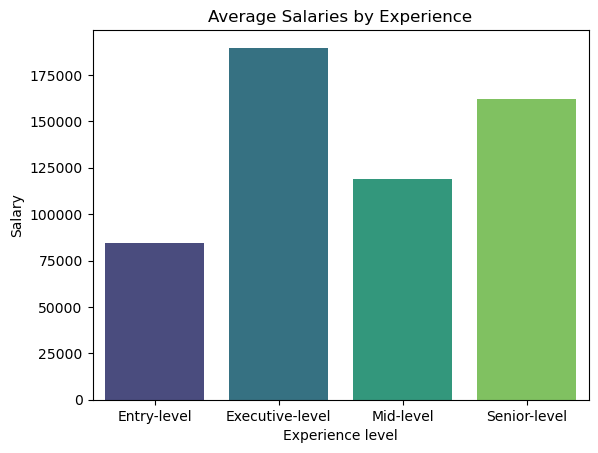

In [3]:
exp_salary=data_science_salaries_df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

plt.title("Average Salaries by Experience")

sns.barplot(x='experience_level',y='salary_in_usd', data=exp_salary, palette='viridis')
plt.xlabel('Experience level')
plt.ylabel('Salary')


plt.savefig(Path('../figures/maria/fig001.png'))

In [4]:
job_titles = data_science_salaries_df.job_title.value_counts().head(11)
job_titles

job_title
Data Engineer                1307
Data Scientist               1243
Data Analyst                  910
Machine Learning Engineer     629
Analytics Engineer            246
Research Scientist            206
Data Architect                176
Research Engineer             136
ML Engineer                   113
Applied Scientist              97
Data Science Manager           86
Name: count, dtype: int64

In [5]:
de = data_science_salaries_df[(data_science_salaries_df["job_title"] == "Data Engineer")]
ds = data_science_salaries_df[(data_science_salaries_df["job_title"] == "Data Scientist")]
da = data_science_salaries_df[(data_science_salaries_df["job_title"] == "Data Analyst")]
mle = data_science_salaries_df[(data_science_salaries_df["job_title"] == "Machine Learning Engineer")]
ae = data_science_salaries_df[(data_science_salaries_df["job_title"] == "Analytics Engineer")]
rs = data_science_salaries_df[(data_science_salaries_df["job_title"] == "Research Scientist")]
da = data_science_salaries_df[(data_science_salaries_df["job_title"] == "Data Architect")]
re = data_science_salaries_df[(data_science_salaries_df["job_title"] == "Research Engineer")]
aps = data_science_salaries_df[(data_science_salaries_df["job_title"] == "Applied Scientist")]
dsm = data_science_salaries_df[(data_science_salaries_df["job_title"] == "Data Science Manager")]

de_x= de.groupby("experience_level")["salary_in_usd"].mean()
ds_x = ds.groupby("experience_level")["salary_in_usd"].mean()
da_x = da.groupby("experience_level")["salary_in_usd"].mean()
mle_x = mle.groupby("experience_level")["salary_in_usd"].mean()
ae_x = ae.groupby("experience_level")["salary_in_usd"].mean()
rs_x = rs.groupby("experience_level")["salary_in_usd"].mean()
da_x = da.groupby("experience_level")["salary_in_usd"].mean()
re_x = re.groupby("experience_level")["salary_in_usd"].mean()
dsm_x = dsm.groupby("experience_level")["salary_in_usd"].mean()
aps_x = aps.groupby("experience_level")["salary_in_usd"].mean()


In [6]:
job_x = pd.DataFrame({"Data Engineer": de_x, 
                    "Data Scientist": ds_x,
                    "Data Analyst" : da_x,
                    "Machine Learning Engineer": mle_x,
                    "Analytics Engineer": ae_x,
                    "Research Scientist": rs_x,
                    "Data Architect": da_x,
                    "Research Engineer": re_x,                    
                    "Applied Scientist": aps_x,
                    "Data Science Manager": dsm_x})
                    
job_x

,Data Engineer,Data Scientist,Data Analyst,Machine Learning Engineer,Analytics Engineer,Research Scientist,Data Architect,Research Engineer,Applied Scientist,Data Science Manager
experience_level,,,,,,,,,,
Entry-level,79441.086207,83387.103093,NaN,96381.620690,94317.571429,144914.105263,NaN,118936.888889,180420.000000,NaN
Executive-level,195357.376471,189050.521739,167500.000000,190950.000000,185916.666667,163017.666667,167500.000000,NaN,NaN,194128.571429
Mid-level,117253.144044,115501.054711,135631.500000,142579.573770,143762.772727,173199.920635,135631.500000,181382.625000,166099.333333,164924.333333
Senior-level,156129.567870,169793.449622,166420.886076,190974.493644,159792.770492,189610.595041,166420.886076,198164.337209,196351.289474,178167.437500


In [7]:
jobs_to_keep = ("Data Engineer", 
               "Data Scientist",
               "Data Analyst",
               "Machine Learning Engineer",
               "Analytics Engineer",
               "Research Scientist",
               "Data Architect",
               "Research Engineer",                    
               "Applied Scientist",
               "Data Science Manager")

condition = data_science_salaries_df ['job_title'].isin(jobs_to_keep)
top_jobs_df = data_science_salaries_df[condition]
top_jobs_df.head()


,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
8,Data Engineer,Executive-level,Full-time,Remote,2024,United States,219650,USD,219650,United States,Medium


## Mean Salary Versus Exeperience for Popular Job Titles



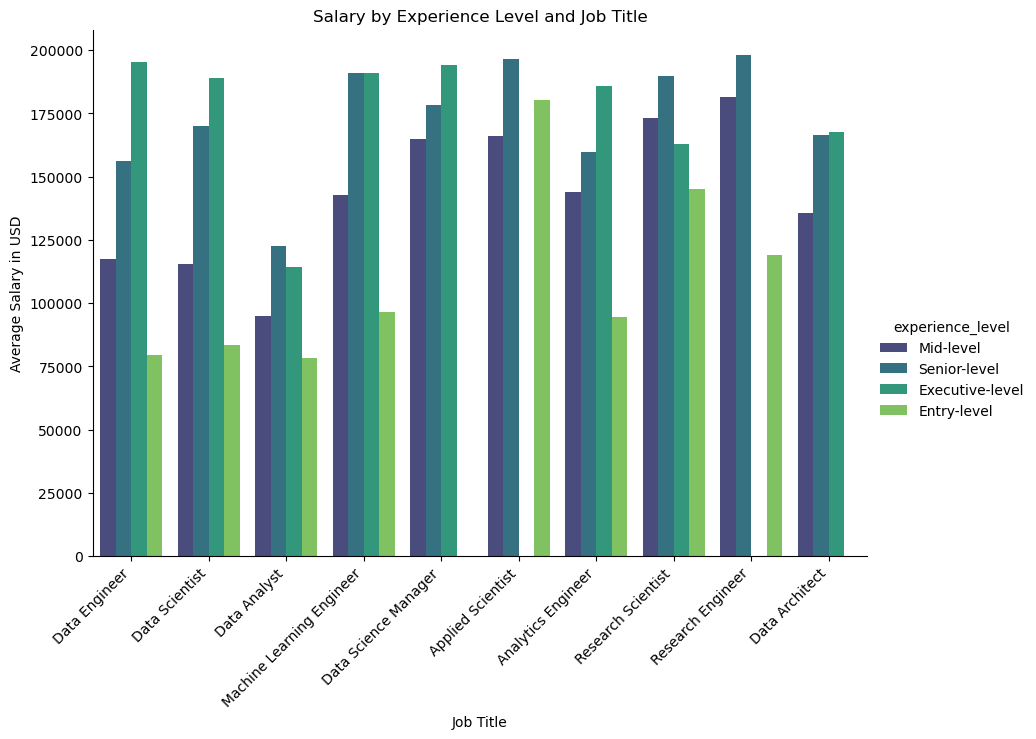

In [8]:

sns.catplot(x='job_title', y='salary_in_usd', hue='experience_level', data= top_jobs_df,  kind='bar', palette='viridis', height=6, aspect=1.5, errorbar=None)
plt.title('Salary by Experience Level and Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')

plt.savefig(Path("../figures/maria/fig002"))

